In [29]:
import pandas as pd
import numpy as np
from os import listdir

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
onlyfiles = [f for f in listdir("noCone") ]
onlyfiles

['0.1025',
 '0.105',
 '0.1075',
 '0.11',
 '0.1125',
 '0.115',
 '0.1175',
 '0.12',
 '0.1225',
 '0.125',
 '0.1275',
 '0.13',
 '0.1325',
 '0.135',
 '0.1375',
 '0.14',
 '0.1425',
 '0.145',
 '0.1475',
 '0.15']

In [4]:
temp = list()
pressure = list()

In [5]:
for index in range(len(onlyfiles)):
    path="noCone/{}/lagrangian/reactingCloud1/T".format(onlyfiles[index])
    with open(path, 'r') as file:
        for line in file.readlines():
            num = float(line.strip('\n'))
            temp.append(num)

In [6]:
for index in range(len(onlyfiles)):
    path="noCone/{}/lagrangian/reactingCloud1/pressure".format(onlyfiles[index])
    with open(path, 'r') as file:
        for line in file.readlines():
            num = float(line.strip('\n'))
            pressure.append(num)

In [7]:
len(temp)

17772

In [8]:
len(pressure)

17772

In [9]:
mixingLine = pd.DataFrame()
mixingLine['temperature'] = temp
mixingLine['pressure'] = pressure
mixingLine.head()

,temperature,pressure
0,591.623,587.508
1,594.147,600.042
2,591.706,595.010
3,591.136,593.030
4,591.336,593.731


In [10]:
mixingLine.to_csv ('Extracted Data/mixingLine.csv', index = False, header=True)

In [34]:
r = np.arange(min(temp),max(temp))

saturation_ice = 100 * np.exp(((-6024.5282) / r) + 24.7219 + (1.0613868e-2 * r) + ((-1.3198824e-5) * r * r) + ((-0.49382577) * np.log(r)) )

saturation_water = 100 * np.exp(((-6096.9385) / r) + 16.635764 + ((-2.711193e-2) * r) + ((1.673952e-5) * r*r) + (2.433502* np.log(r)) )

[219.007 220.007 221.007 222.007 223.007 224.007 225.007 226.007 227.007
 228.007 229.007 230.007 231.007 232.007 233.007 234.007 235.007 236.007
 237.007 238.007 239.007 240.007 241.007 242.007 243.007 244.007 245.007
 246.007 247.007 248.007 249.007 250.007 251.007 252.007 253.007 254.007
 255.007 256.007 257.007 258.007 259.007 260.007 261.007 262.007 263.007
 264.007 265.007 266.007 267.007 268.007 269.007 270.007 271.007 272.007
 273.007 274.007 275.007 276.007 277.007 278.007 279.007 280.007 281.007
 282.007 283.007 284.007 285.007 286.007 287.007 288.007 289.007 290.007
 291.007 292.007 293.007 294.007 295.007 296.007 297.007 298.007 299.007
 300.007 301.007 302.007 303.007 304.007 305.007 306.007 307.007 308.007
 309.007 310.007 311.007 312.007 313.007 314.007 315.007 316.007 317.007
 318.007 319.007 320.007 321.007 322.007 323.007 324.007 325.007 326.007
 327.007 328.007 329.007 330.007 331.007 332.007 333.007 334.007 335.007
 336.007 337.007 338.007 339.007 340.007 341.007 34

In [12]:
saturationCurve = pd.DataFrame()
saturationCurve['temp'] = r
saturationCurve["ice"] = saturation_ice
saturationCurve['water'] = saturation_water
saturationCurve.head()

,temp,ice,water
0,219.007,2.336963,3.980907
1,220.007,2.655030,4.478866
2,221.007,3.012927,5.033261
3,222.007,3.415199,5.649802
4,223.007,3.866856,6.334699


In [13]:
saturationCurve.to_csv ('Extracted Data/saturationCurve.csv', index = False, header=True)

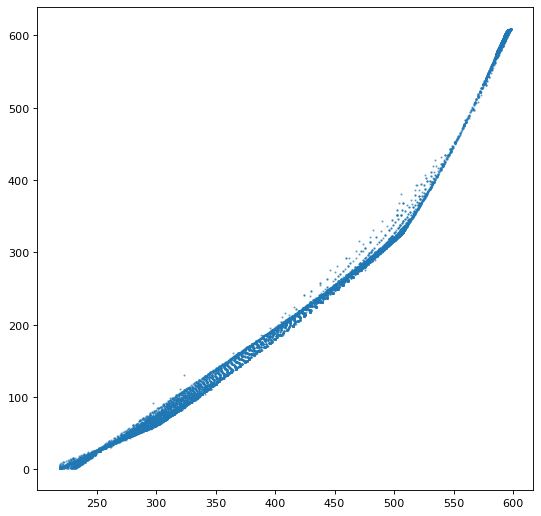

In [35]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(temp, pressure, s=1, alpha=0.5)

plt.show()